# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
!pip install h2o
import h2o
h2o.init()
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OSupportVectorMachineEstimator
from h2o.grid.grid_search import H2OGridSearch




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



     |████████████████████████████████| 65.7MB 104kB/s 
     |████████████████████████████████| 164.6MB 84kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.5-py2.py3-none-any.whl size=164673888 sha256=404e7a6160598db4f0aef96414bea520feb03e799a106dbcace74fbad5239b12
  Stored in directory: /root/.cache/pip/wheels/f7/54/f6/f88d58b676e135bbab981238fcf77f27161ec02b7cc893d8c7
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpny_mfda5
  JVM stdout: /tmp/tmpny_mfda5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpny_mfda5/h2o_unknownUser_started_from_python.err
  

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.5
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_cqzloz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
data.columns

Index(['Max_Platlets', 'Min_Platlets', 'Init_ESR', 'Max_ESR',
       'Init_Fibrinogen', 'Max_Fibrinogen', 'Initial_LDH', 'Max_LDH',
       'Max_Leucocytes', 'Min_Leucocytes', 'Hemoglobin', 'Max_Creatinine',
       'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP', 'Treatment',
       'Diagnosis', 'COVID-19', 'Pneumonia', 'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF', 'ALT', 'AST',
       'duration', 'Age', 'Max_Creatinine_mg_dl', 'GFR', 'L/Pl_Ratio'],
      dtype='object')

In [ ]:
data = pd.read_csv('/content/Severity_COVID.csv')

In [ ]:
data['Gender'] = data['Gender'].map({'male':1, 'female':0})

In [ ]:
columns = ['Max_Platlets',  'Max_ESR',
       'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes',   'Max_Creatinine',
      'Max_CRP', 
       'ALT', 'AST', 'Age']

In [ ]:
sevi = ['Severity']

# Статистический анализ

In [ ]:
for sev in sevi:
  df_s = data[data[sev] == 1]
  df_m = data[data[sev] == 0]
  for cat in columns:
    lst1 = df_s[cat]
    lst2 = df_m[cat]
    shapiro_test = stats.shapiro(lst1) # тест шапиро-уилка
    shapiro_test2 = stats.shapiro(lst2) # тест шапиро-уилка
    if shapiro_test[1] < .05:
      print('1Данные {0} распределены ненормально,\
            p-value - {1}'.format(cat,  shapiro_test[1]))
    if shapiro_test2[1] < .05:
      print('0Данные {0} распределены ненормально,\
            p-value - {1}'.format(cat,  shapiro_test2[1]))
    else:
      pass

0Данные Max_Platlets распределены ненормально,            p-value - 0.03815307468175888
1Данные Max_ESR распределены ненормально,            p-value - 0.026598751544952393
1Данные Max_LDH распределены ненормально,            p-value - 0.002017637249082327
0Данные Max_LDH распределены ненормально,            p-value - 1.4950542193137295e-10
0Данные Max_Leucocytes распределены ненормально,            p-value - 4.673117086785158e-22
1Данные Max_Creatinine распределены ненормально,            p-value - 1.2878687699613423e-11
0Данные Max_Creatinine распределены ненормально,            p-value - 1.3073617743941668e-09
1Данные Max_CRP распределены ненормально,            p-value - 0.0006246382254175842
0Данные Max_CRP распределены ненормально,            p-value - 3.8747624553359117e-10
1Данные ALT распределены ненормально,            p-value - 3.253442515394056e-10
0Данные ALT распределены ненормально,            p-value - 1.2806048756142108e-11
1Данные AST распределены ненормально,         

In [ ]:
data[data[sev] == 1]['Max_Platlets'].describe()

count     53.000000
mean     341.188679
std      112.054770
min      100.000000
25%      257.000000
50%      356.000000
75%      428.000000
max      579.000000
Name: Max_Platlets, dtype: float64

In [ ]:
data[data[sev] == 0]['Max_ESR'].describe()

count    106.000000
mean      30.537736
std       14.635361
min        2.000000
25%       20.000000
50%       29.000000
75%       40.000000
max       65.000000
Name: Max_ESR, dtype: float64

In [ ]:
data[data[sev] == 1]['Max_Leucocytes'].describe()

count    53.000000
mean     11.622830
std       3.869724
min       2.950000
25%       9.650000
50%      11.760000
75%      13.500000
max      21.220000
Name: Max_Leucocytes, dtype: float64

In [ ]:
data[data[sev] == 1]['Age'].describe()

count    53.000000
mean     64.075472
std      14.432667
min      36.000000
25%      54.000000
50%      65.000000
75%      76.000000
max      91.000000
Name: Age, dtype: float64

In [ ]:
data[data[sev] == 0]['Age'].describe()

count    106.000000
mean      61.566038
std       13.486515
min       33.000000
25%       52.000000
50%       61.000000
75%       70.000000
max       90.000000
Name: Age, dtype: float64

In [ ]:
def Basic_statistics(lst_1, lst_2):
    """ 
    Функция "Базовые статистики"

    На вход получает 2 списка данных для сравнения.
    На выходе получаем p-values, при сравнении признаков. 
    
    """
    res_mw = mannwhitneyu(lst_1, lst_2, 
                       use_continuity=True, 
                       alternative=None) # u -тест манна-уитни
    res_kw = kruskal(lst_1, lst_2)## краскела уолиса
    anova = stats.f_oneway(lst_1, lst_2) #тест анова
    return res_mw[1], res_kw[1],  anova[1]


In [ ]:
for sev in sevi:
  df_s = data[data[sev] == 1]
  df_m = data[data[sev] == 0]
  for cat in columns:
    lst1 = df_s[cat]
    print('Данные {0}: мединана - {1}, квартиль 25 - {2},\
      квартиль 75 - {3}\n '.format(cat,  lst1.median(), lst1.quantile(.25),
      lst1.quantile(.75) ))
    lst2 = df_m[cat]
    print('Данные {0}: мединана - {1}, квартиль 25 - {2},\
      квартиль 75 - {3}\n '.format(cat,  lst2.median(), lst2.quantile(.25),
      lst2.quantile(.75) ))
    mw =  Basic_statistics(lst1, lst2)[0]
    kw =  Basic_statistics(lst1, lst2)[1]
    an =  Basic_statistics(lst1, lst2)[2]
    if mw < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Манна-Уитни \n {2}'.format(cat,  mw, sev))
    if kw < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Крускала-Уоллиса \n {2}'.format(cat,  kw, sev))
    if an < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Анова \n {2}'.format(cat,  an, sev))
    else:
      pass

Данные Max_Platlets: мединана - 356.0, квартиль 25 - 257.0,      квартиль 75 - 428.0
 
Данные Max_Platlets: мединана - 319.0, квартиль 25 - 264.75,      квартиль 75 - 388.75
 
Данные Max_ESR: мединана - 43.0, квартиль 25 - 32.0,      квартиль 75 - 54.0
 
Данные Max_ESR: мединана - 29.0, квартиль 25 - 20.0,      квартиль 75 - 40.0
 
Данные Max_ESR статисически значимо различаются в подгруппах,            p-value - 1.017593192860352e-06, тест Манна-Уитни 
 Severity
Данные Max_ESR статисически значимо различаются в подгруппах,            p-value - 2.0168734189727886e-06, тест Крускала-Уоллиса 
 Severity
Данные Max_ESR статисически значимо различаются в подгруппах,            p-value - 9.411831786218658e-07, тест Анова 
 Severity
Данные Max_Fibrinogen: мединана - 7.93, квартиль 25 - 6.93,      квартиль 75 - 9.5
 
Данные Max_Fibrinogen: мединана - 6.505, квартиль 25 - 5.61,      квартиль 75 - 8.057500000000001
 
Данные Max_Fibrinogen статисически значимо различаются в подгруппах,           

In [ ]:
categ = ['Gender',  
         'IHD', 'COPD',
        'Obesity', 'Diabetes']
for cat in categ:
  df_s = data[data['Severity'] == 1]
  df_m = data[data['Severity'] == 0]
  print(df_s[cat].value_counts(),
        df_m[cat].value_counts()
                  )

0    30
1    23
Name: Gender, dtype: int64 1    59
0    47
Name: Gender, dtype: int64
1.0    27
0.0    26
Name: IHD, dtype: int64 0.0    54
1.0    52
Name: IHD, dtype: int64
0.0    52
1.0     1
Name: COPD, dtype: int64 0.0    101
1.0      5
Name: COPD, dtype: int64
0.0    50
1.0     3
Name: Obesity, dtype: int64 0.0    103
1.0      3
Name: Obesity, dtype: int64
0.0    49
1.0     4
Name: Diabetes, dtype: int64 0.0    102
1.0      4
Name: Diabetes, dtype: int64


In [ ]:
from scipy import stats
stats.fisher_exact([[53, 4], [106,4]]) # категориальные данные сравнивались при помощи точного теста Фишера

In [ ]:
data = h2o.H2OFrame(data)


Parse progress: |█████████████████████████████████████████████████████████| 100%


# Автоматическое машинное обучение
целевой признак - тяжесть

In [ ]:
predictors = ['Max_Platlets',  'Max_ESR',
       'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes',   'Max_Creatinine',
      'Max_CRP', 
       'ALT', 'AST', 'Gender',  
        'Pneumonia', 'IHD', 'COPD'
        ,  'Bronchial_asthma', 'Obesity', 'Diabetes', 
       'Age'] # определяем признаки, которые будут использоваться в качестве предсказателей
 # убираем из этого списка целевую - "Severity"(Тяжесть)
data['Severity'] = data['Severity'].asfactor() # определяем "Severity" как фактор, который нужно предсказать
train, test = data.split_frame(seed = 42, ratios = [.8])
target = 'Severity'

In [ ]:
# Запускаем AUTOML
aml = H2OAutoML(max_models=20, nfolds=5,
                 seed=123, balance_classes=True)
aml.train(x = predictors,
           y = target,
           training_frame = train)


# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████
09:22:34.369: Skipping training of model GBM_5_AutoML_20210321_092211 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210321_092211.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 129.0.


████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210321_092211_model_2,0.868717,0.445135,0.794797,0.202674,0.382208,0.146083
GBM_4_AutoML_20210321_092211,0.858824,0.456246,0.737765,0.213636,0.389554,0.151752
GBM_3_AutoML_20210321_092211,0.854278,0.466238,0.73168,0.224198,0.391054,0.152923
GBM_1_AutoML_20210321_092211,0.850267,0.500737,0.789518,0.245856,0.399539,0.159631
GBM_2_AutoML_20210321_092211,0.844652,0.478166,0.731303,0.224198,0.400245,0.160196
XRT_1_AutoML_20210321_092211,0.844118,0.453792,0.759119,0.244251,0.387615,0.150245
DRF_1_AutoML_20210321_092211,0.836898,0.466059,0.741742,0.209358,0.39487,0.155923
GBM_grid__1_AutoML_20210321_092211_model_1,0.836364,0.486502,0.742692,0.240374,0.403001,0.16241
StackedEnsemble_BestOfFamily_AutoML_20210321_092211,0.833155,0.475924,0.716751,0.21992,0.390192,0.152249
StackedEnsemble_AllModels_AutoML_20210321_092211,0.826471,0.492403,0.717201,0.220722,0.401039,0.160832


In [ ]:
aml.leader.model_performance(test) # качество модели на тестовой выборке


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13919310347693914
RMSE: 0.3730859196980491
LogLoss: 0.4108262618798294
Mean Per-Class Error: 0.17460317460317465
AUC: 0.8730158730158729
AUCPR: 0.7613106839896512
Gini: 0.7460317460317458

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17681625584887997: 


,,0,1,Error,Rate
0,0,16.0,5.0,0.2381,(5.0/21.0)
1,1,1.0,8.0,0.1111,(1.0/9.0)
2,Total,17.0,13.0,0.2,(6.0/30.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.176816,0.727273,12.0
1,max f2,0.062971,0.833333,17.0
2,max f0point5,0.446882,0.731707,7.0
3,max accuracy,0.446882,0.833333,7.0
4,max precision,0.987421,1.000000,0.0
5,max recall,0.062971,1.000000,17.0
6,max specificity,0.987421,1.000000,0.0
7,max absolute_mcc,0.176816,0.601836,12.0
8,max min_per_class_accuracy,0.189144,0.761905,11.0
9,max mean_per_class_accuracy,0.176816,0.825397,12.0



Gains/Lift Table: Avg response rate: 30.00 %, avg score: 26.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.033333,0.985094,3.333333,3.333333,1.000000,0.987421,1.000000,0.987421,0.111111,0.111111,233.333333,233.333333,0.111111
1,2,0.033333,0.982766,0.000000,3.333333,0.000000,0.000000,1.000000,0.987421,0.000000,0.111111,-100.000000,233.333333,0.111111
2,3,0.033333,0.980438,0.000000,3.333333,0.000000,0.000000,1.000000,0.987421,0.000000,0.111111,-100.000000,233.333333,0.111111
3,4,0.066667,0.979267,3.333333,3.333333,1.000000,0.979395,1.000000,0.983408,0.111111,0.222222,233.333333,233.333333,0.222222
4,5,0.066667,0.979035,0.000000,3.333333,0.000000,0.000000,1.000000,0.983408,0.000000,0.222222,-100.000000,233.333333,0.222222
5,6,0.100000,0.859135,3.333333,3.333333,1.000000,0.978595,1.000000,0.981804,0.111111,0.333333,233.333333,233.333333,0.333333
6,7,0.166667,0.683228,1.666667,2.666667,0.500000,0.816945,0.800000,0.915860,0.111111,0.444444,66.666667,166.666667,0.396825
7,8,0.200000,0.476975,0.000000,2.222222,0.000000,0.488600,0.666667,0.844650,0.000000,0.444444,-100.000000,122.222222,0.349206
8,9,0.300000,0.368286,2.222222,2.222222,0.666667,0.434513,0.666667,0.707938,0.222222,0.666667,122.222222,122.222222,0.523810
9,10,0.400000,0.181747,1.111111,1.944444,0.333333,0.261720,0.583333,0.596383,0.111111,0.777778,11.111111,94.444444,0.539683


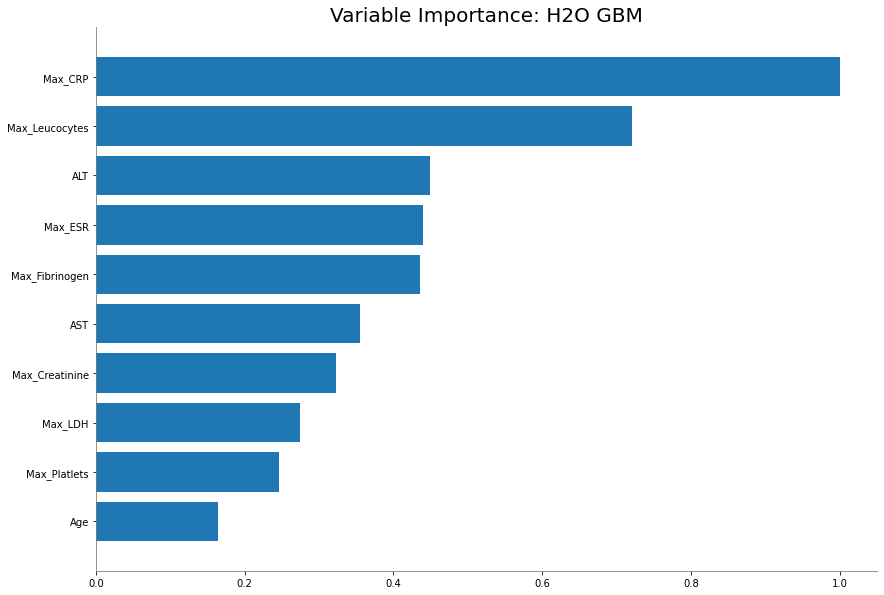

In [ ]:
aml.leader.varimp_plot() # важность признаков для построения модели